## Import Module

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Dataset

In [ ]:
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Informasi Mengenai Dataset

In [ ]:
print("Dimensi train set", train_df.shape)
print("Dimensi tes set", test_df.shape)

Dimensi train set (891, 12)
Dimensi tes set (418, 11)


In [ ]:
# informasi train dataset
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# informasi test dataset
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


## Menangani Missing Values

### Mencari Missing Values dalam Dataset

In [ ]:
# train dataset
train_df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [ ]:
# test dataset
test_df.isnull().sum().sort_values(ascending=False)

Cabin          327
Age             86
Fare             1
PassengerId      0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Embarked         0
dtype: int64

### Penanganan Missing Values Untuk Train Dataset

#### Kolom "Age"

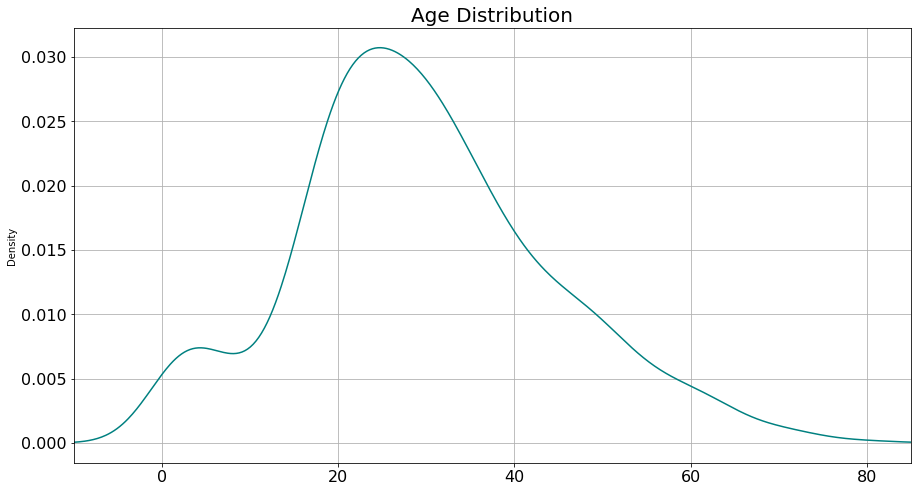

In [ ]:
plt.figure(figsize=(15,8))
train_df["Age"].plot(kind='density', color='teal', fontsize=16)
plt.xlim(-10,85)
plt.grid()
plt.title("Age Distribution", fontsize=20)
plt.show()

##### Fill Missing Value
Karena distribusi dari "Age" cenderung skewed dan bersifat numerik maka missing values dalam kolom "Age" akan diisi oleh median dari data "Age"

In [ ]:
train_df["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)


#### Kolom "Embarked"

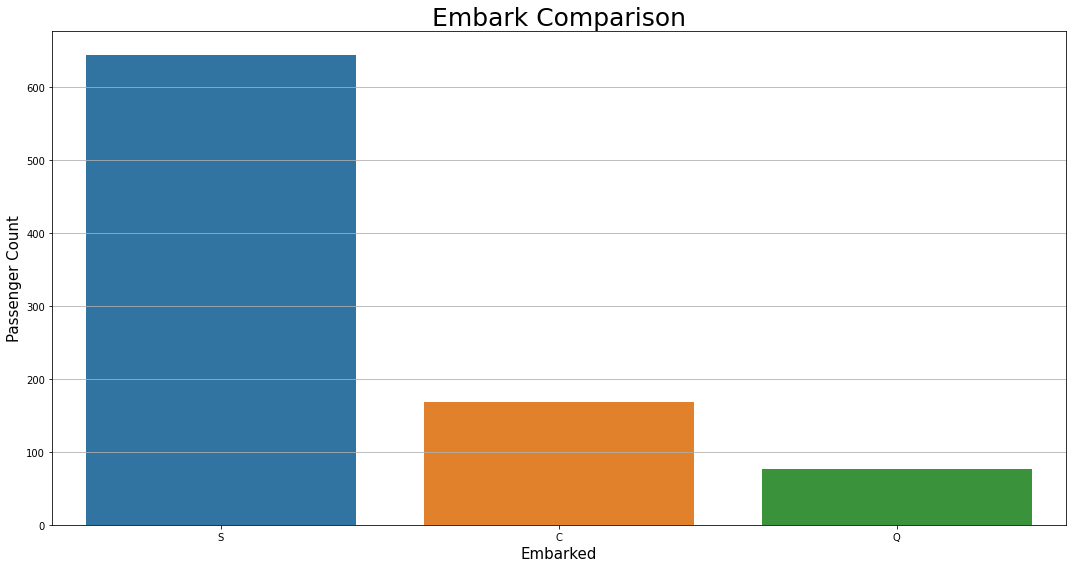

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_df, x='Embarked')
plt.grid(axis='y')
plt.title("Embark Comparison", fontsize=25)
plt.xlabel("Embarked",fontsize=15)
plt.ylabel("Passenger Count",fontsize=15)
plt.tight_layout()

##### Fill Missing Value
Kolom "Embarked" bersifat kategorikal sehingga missing values di dalamnya akan diisi oleh nilai modus dari data tersebut

In [ ]:
train_df['Embarked'].fillna(train_df["Embarked"].mode()[0], inplace=True)

#### Kolom "Cabin"

In [ ]:
percent_cabin_null = train_df["Cabin"].isnull().sum() / train_df["Cabin"].size *100
print("Persentase missing values dalam kolom kabin berjumlah", percent_cabin_null, "%")


Persentase missing values dalam kolom kabin berjumlah 77.10437710437711 %


##### Fill Missing Value
Karena missing values dalam kolom "Cabin" terlalu banyak maka kolom kabin akan dihilangkan

In [ ]:
train_df.drop('Cabin', axis=1, inplace=True)

### Penanganan Missing Values untuk Test Dataset

#### Kolom "Age"

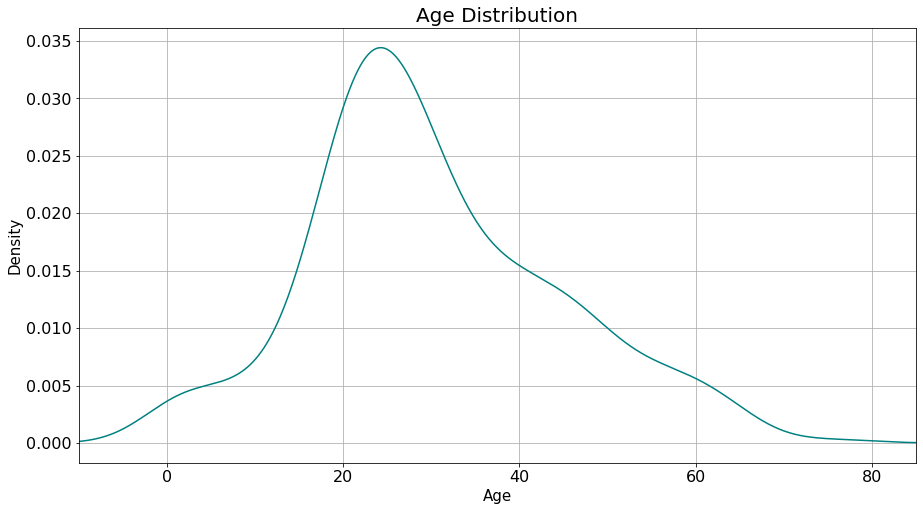

In [ ]:
plt.figure(figsize=(15,8))
test_df["Age"].plot(kind='density', color='teal',fontsize=16)
plt.xlim(-10,85)
plt.xlabel("Age",fontsize=15)
plt.ylabel("Density",fontsize=15)
plt.grid()
plt.title("Age Distribution",fontsize=20)

plt.show()

##### Fill Missing Value
Sama seperti pada train dataset, missing values kolom "Age" pada test dataset pun diisi dengan nilai median

In [ ]:
test_df["Age"].fillna(test_df["Age"].median(skipna=True), inplace=True)

#### Kolom "Fare"

In [ ]:
test_df["Fare"].max()

512.3292

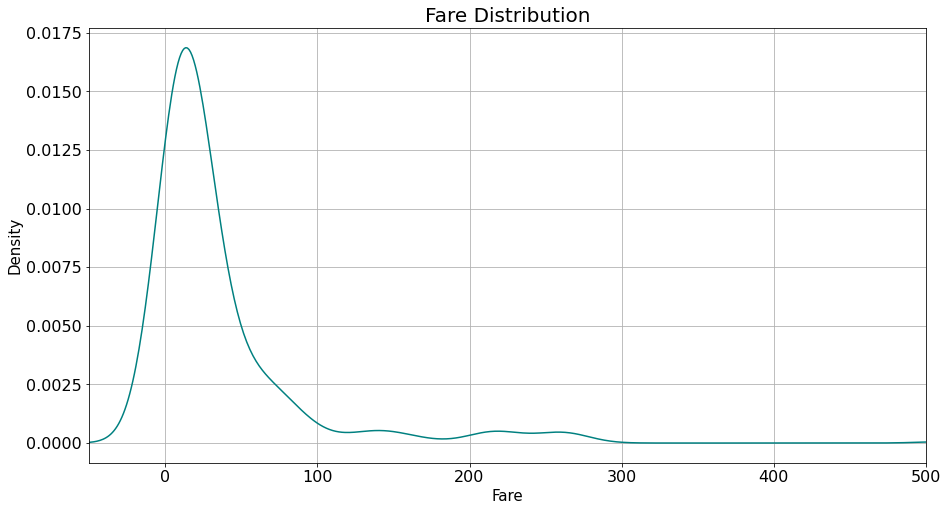

In [ ]:
plt.figure(figsize=(15,8))
test_df["Fare"].plot(kind='density', color='teal',fontsize=16)
plt.xlabel("Fare",fontsize=15)
plt.ylabel('Density',fontsize=15)
plt.xlim(-50,500)
plt.grid()
plt.title("Fare Distribution", fontsize=20)
plt.show()

##### Fill Missing Value

In [ ]:
test_df['Fare'].fillna(test_df["Fare"].median(), inplace=True)

#### Kolom "Cabin"

In [ ]:
percent_cabin_null = test_df["Cabin"].isnull().sum() / test_df["Cabin"].size *100
print("Persentase missing values dalam kolom kabin berjumlah", percent_cabin_null, "%")


Persentase missing values dalam kolom kabin berjumlah 78.22966507177034 %


##### Fill Missing Value
sama seperti train dataset nilai missing values "Cabin" pada test dataset terlalu banyak sehingga dihilangkan

In [ ]:
test_df.drop('Cabin', axis=1, inplace=True)

### Hasil Penanganan Missing Values

In [ ]:
# Train Dataset
train_df.isnull().sum().sort_values(ascending=False)


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [ ]:
# Test Dataset
test_df.isnull().sum().sort_values(ascending=False)


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Visualization

### Perbandingan jumlah penumpang selamat

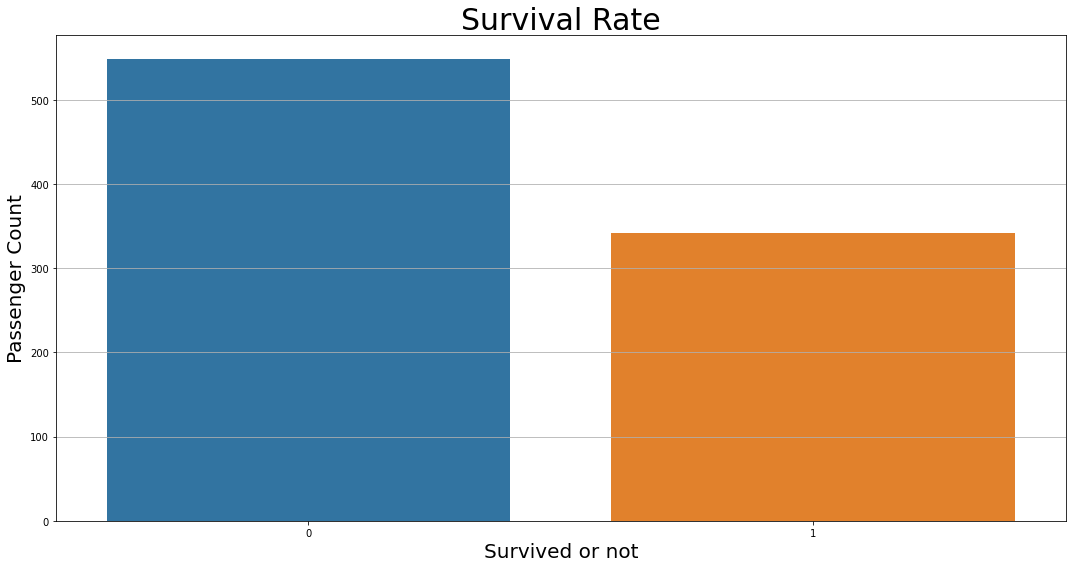

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_df, x='Survived')
plt.grid(axis='y')
plt.xlabel('Survived or not',fontsize=20)
plt.ylabel('Passenger Count',fontsize=20)
plt.title("Survival Rate",fontsize=30)
plt.tight_layout()

### Perbandingan penumpang berdasarkan kelas

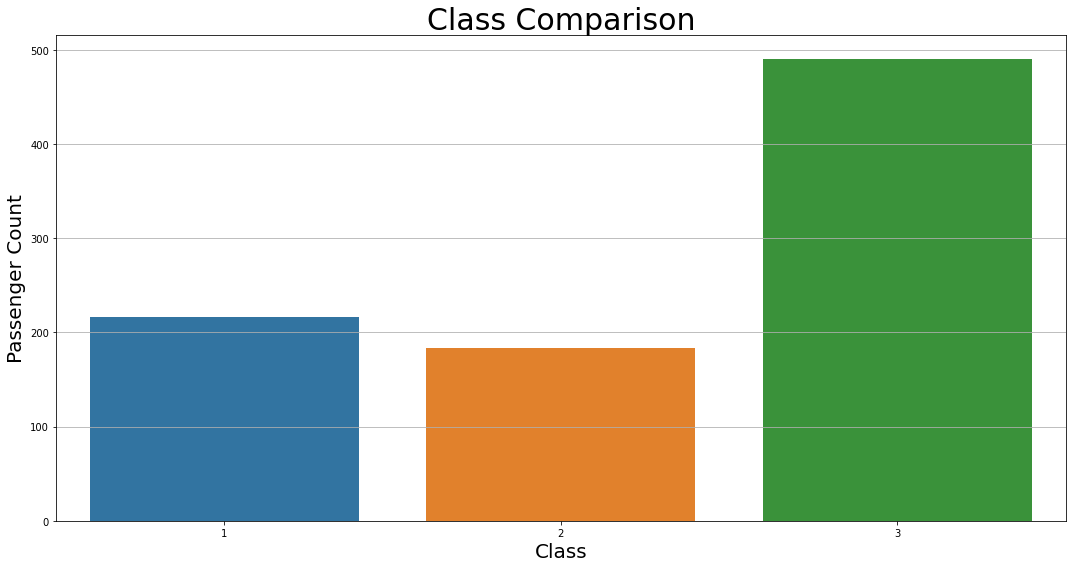

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_df, x='Pclass')
plt.grid(axis='y')
plt.xlabel('Class',fontsize=20)
plt.ylabel('Passenger Count',fontsize=20)
plt.title("Class Comparison",fontsize=30)
plt.tight_layout()

In [ ]:
def bar_chart(feature):
  survived = train_df[train_df["Survived"]==1][feature].value_counts()
  dead = train_df[train_df["Survived"]==0][feature].value_counts()
  df=pd.DataFrame([survived,dead])
  df.index=["Survived","Dead"]
  df.plot(kind="bar", stacked = False, figsize=(15,8))
  plt.xticks(rotation=0,fontsize=15)
  plt.grid(axis='y')
  plt.ylabel('Passenger Count',fontsize=25)

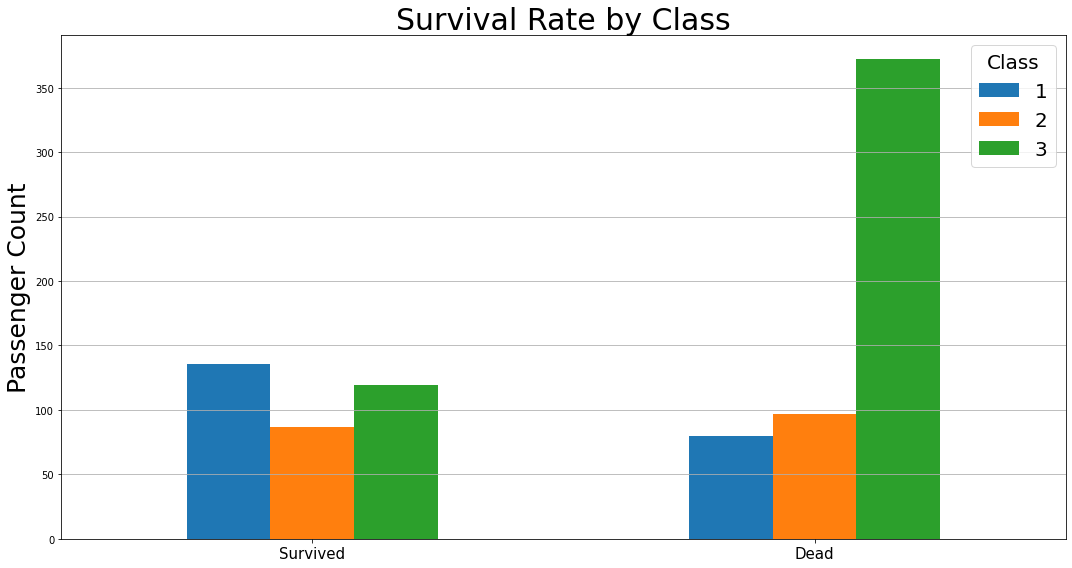

In [ ]:
bar_chart("Pclass")
plt.title("Survival Rate by Class",fontsize=30)
plt.legend(title="Class",title_fontsize=20,fontsize=20)
plt.tight_layout()

### Perbandingan jenis kelamin penumpang

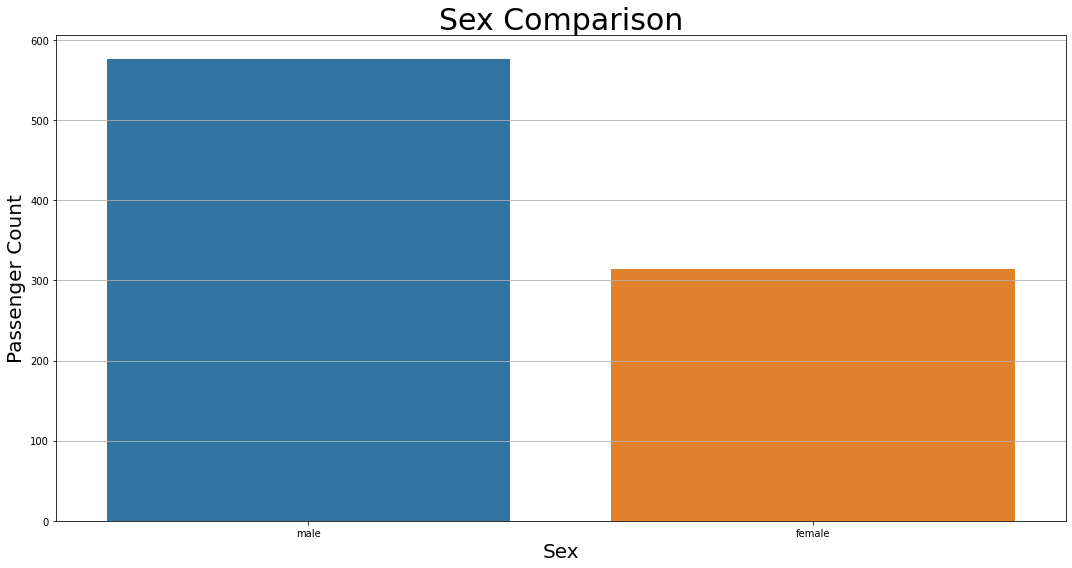

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_df, x='Sex')
plt.grid(axis='y')
plt.xlabel('Sex',fontsize=20)
plt.ylabel('Passenger Count',fontsize=20)
plt.title("Sex Comparison",fontsize=30)
plt.tight_layout()

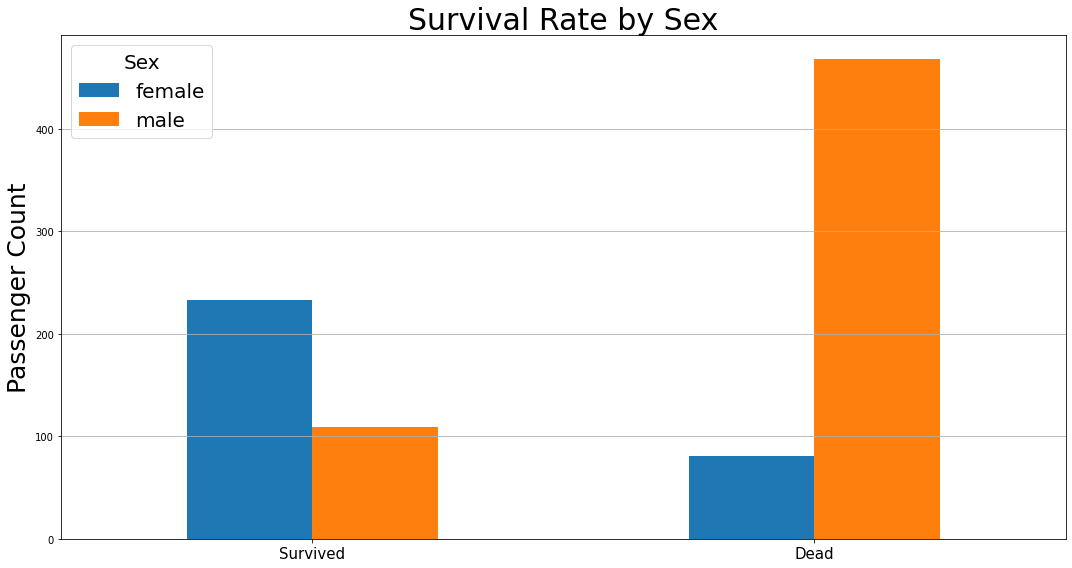

In [ ]:
bar_chart("Sex")
plt.title("Survival Rate by Sex",fontsize=30)
plt.legend(title="Sex",title_fontsize=20,fontsize=20)
plt.tight_layout()

### Distribusi umur

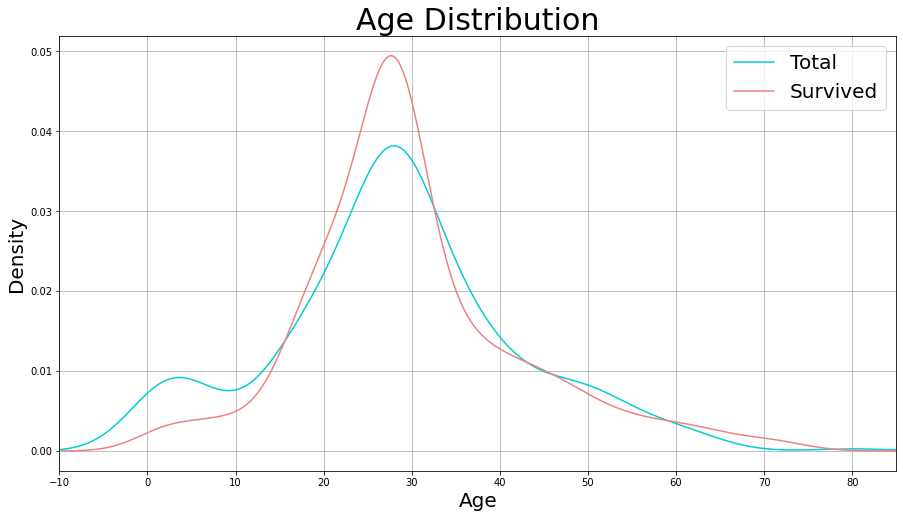

In [ ]:
plt.figure(figsize=(15,8))
train_df["Age"][train_df.Survived == 1].plot(kind='density', color='darkturquoise')
train_df["Age"][train_df.Survived == 0].plot(kind='density', color='lightcoral')
plt.legend(["Total",'Survived', 'Died'],fontsize=20)
plt.xlim(-10,85)
plt.grid()
plt.xticks(np.arange(-10,90,10))
plt.title("Age Distribution",fontsize=30)
plt.xlabel("Age",fontsize=20)
plt.ylabel("Density",fontsize=20)
plt.show()

### Distribusi Tarif Tiket

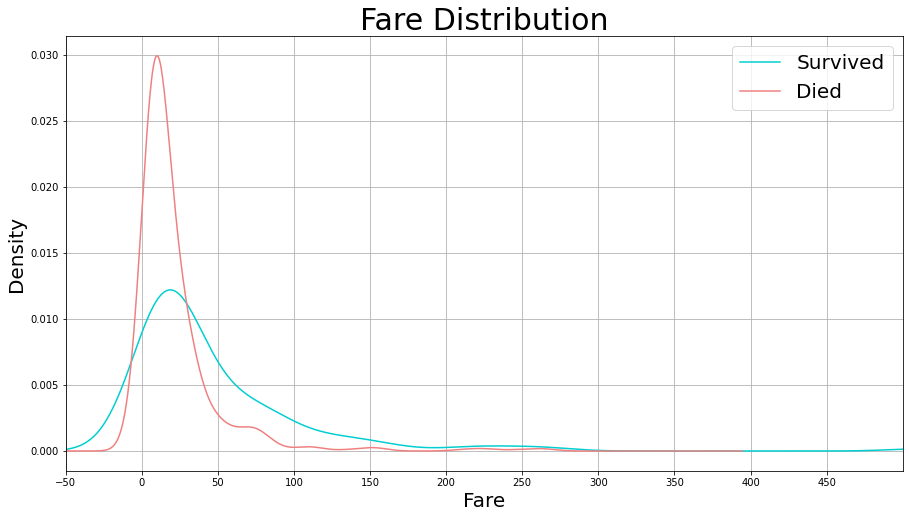

Tarif minimal 0.0
Tarif maksimal 512.3292


In [ ]:
plt.figure(figsize=(15,8))
train_df["Fare"][train_df.Survived == 1].plot(kind='density', color='darkturquoise')
train_df["Fare"][train_df.Survived == 0].plot(kind='density', color='lightcoral')
plt.legend(['Survived', 'Died'],fontsize=20)
plt.xlim(--50,500)
plt.grid()
plt.xticks(np.arange(-50,500,50))
plt.title("Fare Distribution",fontsize=30)
plt.xlabel("Fare",fontsize=20)
plt.ylabel("Density",fontsize=20)
plt.show()
print("Tarif minimal", train_df["Fare"].min())
print("Tarif maksimal", train_df["Fare"].max())

### Perbandingan Embarked

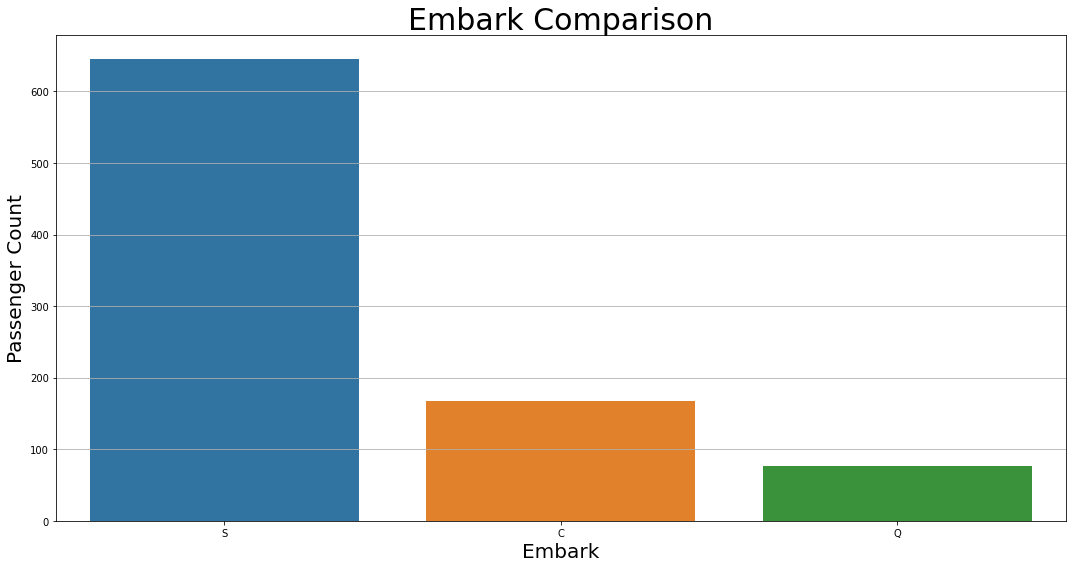

In [ ]:
plt.figure(figsize=(15,8))
sns.countplot(data=train_df, x='Embarked')
plt.grid(axis='y')
plt.xlabel('Embark',fontsize=20)
plt.ylabel('Passenger Count',fontsize=20)
plt.title("Embark Comparison",fontsize=30)
plt.tight_layout()

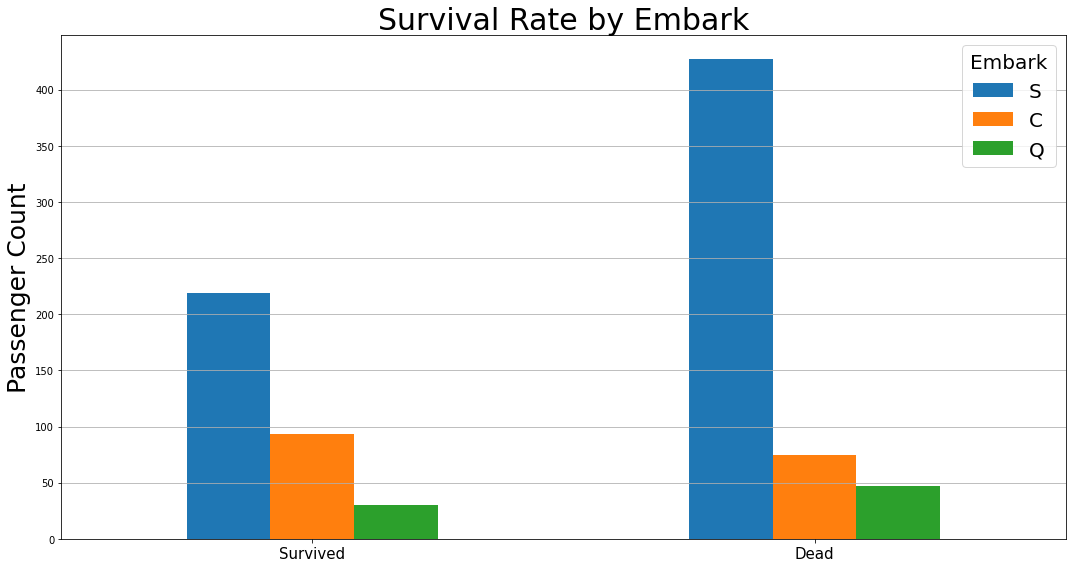

In [ ]:
bar_chart("Embarked")
plt.title("Survival Rate by Embark", fontsize=30)
plt.legend(title="Embark",title_fontsize=20,fontsize=20 )
plt.tight_layout()

### Matriks Korelasi

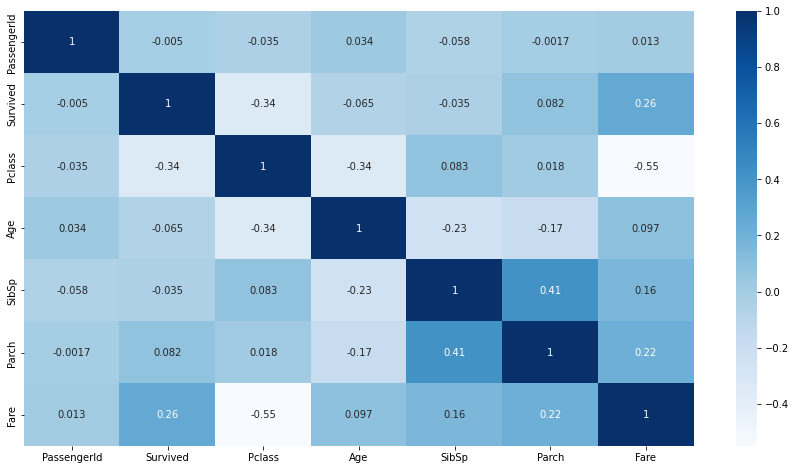

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="Blues")
plt.show()

## Penambahan Fitur

### Fitur "FamilySize"
Karena fitur "SibSp" dan fitur "Parch" memiliki kesamaan yaitu sama-sama merepresentasikan jumlah keluarga, maka dibuatlah sebuah fitur baru yang merupakan gabungan fitur "SibSp" dan "Parch"

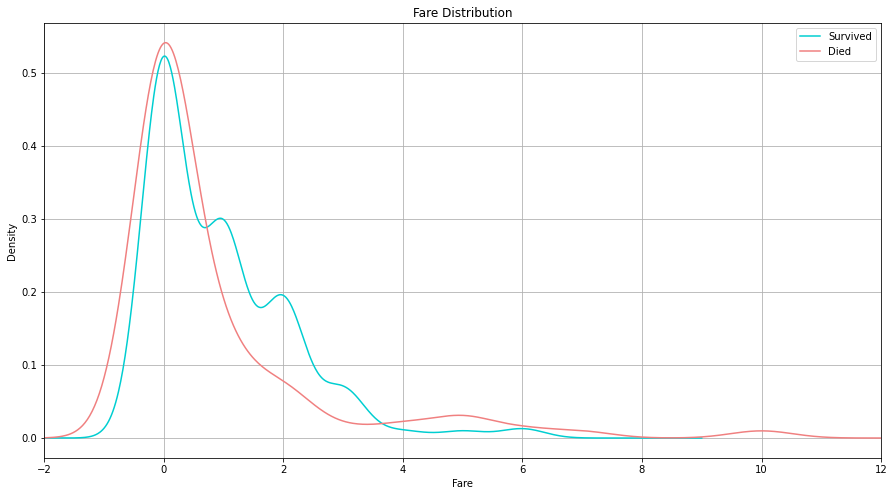

,FamilySize,Survived
3,3,0.724138
2,2,0.578431
1,1,0.552795
6,6,0.333333
0,0,0.303538
4,4,0.200000
5,5,0.136364
7,7,0.000000
8,10,0.000000


In [ ]:
train_df['FamilySize'] = train_df['SibSp'] + train_df['Parch']

plt.figure(figsize=(15,8))
train_df["FamilySize"][train_df.Survived == 1].plot(kind='density', color='darkturquoise')
train_df["FamilySize"][train_df.Survived == 0].plot(kind='density', color='lightcoral')
plt.legend(['Survived', 'Died'])
plt.xlim(-2,12)
plt.grid()
plt.title("Fare Distribution")
plt.xlabel("Fare")
plt.show()

train_df[['FamilySize' , 'Survived']].groupby(['FamilySize'] , as_index=False).mean().sort_values(by='Survived' , ascending=False)

### Fitur "IsAlone"
Selanjutnya ditambahkan fitur "IsAlone" yang merepresentasikan apakah seseorang tersebut sendirian atau bersama keluarganya saat menaiki kapal titanic

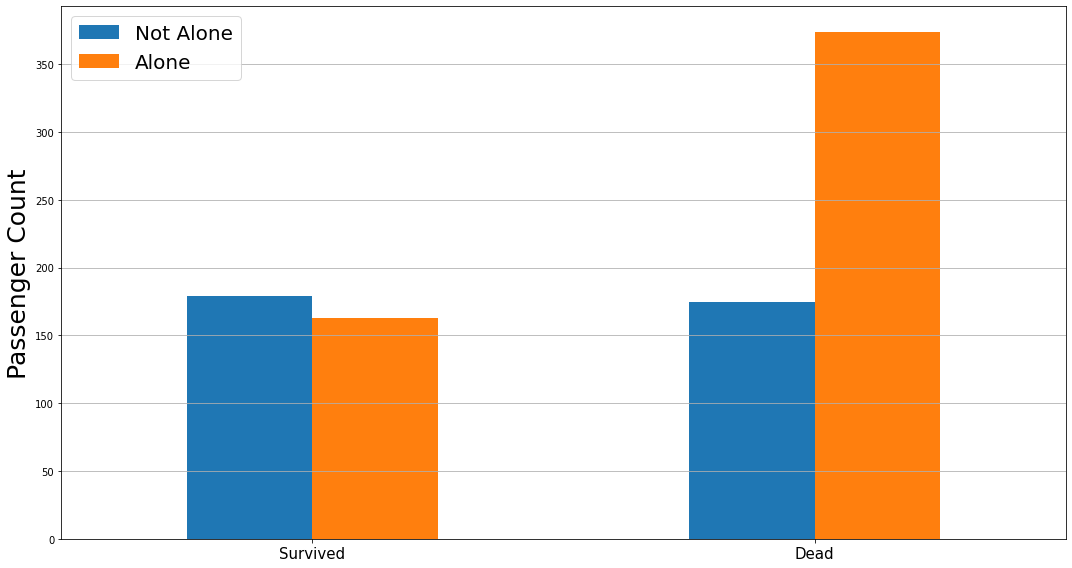

In [ ]:
train_df['IsAlone'] = train_df['FamilySize'].apply(lambda x: 0 if x>0 else 1)

bar_chart("IsAlone")
plt.legend(['Not Alone', 'Alone'], fontsize=20)
plt.tight_layout()

In [ ]:
# Untuk test dataset
test_df['FamilySize'] = test_df['SibSp'] + test_df['Parch']
test_df['IsAlone'] = test_df['FamilySize'].apply(lambda x: 0 if x>0 else 1)

test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,IsAlone
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,0,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,1,0
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,0,1
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,2,0


### Drop fitur "FamilySize", "SibSp", dan "Parch"



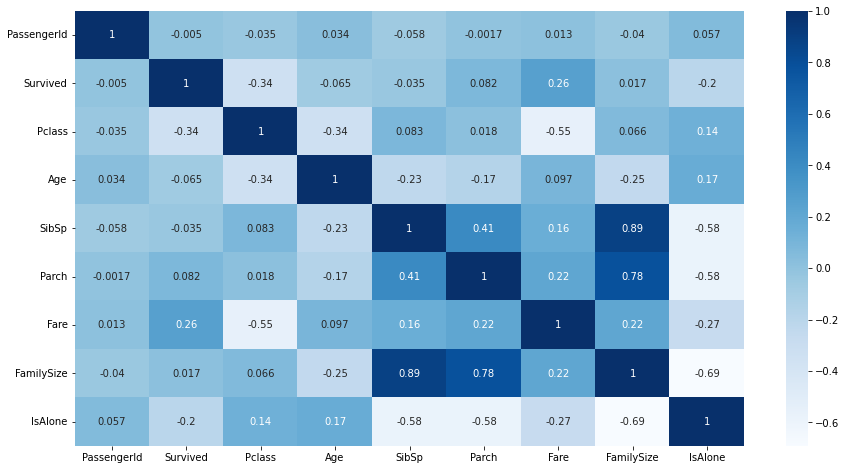

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(train_df.corr(), annot=True, cmap="Blues")
plt.show()

Karena fitur "FamilySize", "SibSp", "Parch", dan "IsAlone" saling berkaitan dan merepresentasikan data yang serupa maka hanya fitur "IsAlone" yang akan digunakan, dan selainnya akan di drop

In [ ]:
train_df.drop(columns=['Parch' , 'FamilySize' , 'SibSp'] , axis=1 , inplace=True)
test_df.drop(columns=['Parch' , 'FamilySize' , 'SibSp'] , axis=1 , inplace=True)

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,IsAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,A/5 21171,7.2500,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,PC 17599,71.2833,C,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,113803,53.1000,S,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,373450,8.0500,S,1


## Preprocessing

### Drop fitur 'PassengerId',  'Name',  dan 'Ticket'
Karena ketiga fitur tersebut tidak berpengaruh kepada target (Survived) maka ketiga fitur tersebut akan didrop

In [ ]:
train_df.drop(['PassengerId' , 'Name' , 'Ticket'] , axis=1 , inplace=True)
test_df.drop(['PassengerId' , 'Name' , 'Ticket'] , axis=1 , inplace=True)

### Pemisahan fitur dan target

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

y = train_df['Survived']
X = train_df.drop(['Survived'], axis=1)



## Mengubah data kategori menjadi numerik

In [ ]:
X = pd.get_dummies(X , columns=['Sex' , 'Embarked'])
X.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,7.2500,0,0,1,0,0,1
1,1,38.0,71.2833,0,1,0,1,0,0
2,3,26.0,7.9250,1,1,0,0,0,1
3,1,35.0,53.1000,0,1,0,0,0,1
4,3,35.0,8.0500,1,0,1,0,0,1


In [ ]:
test_df = pd.get_dummies(test_df , columns=['Sex' , 'Embarked'])
test_df.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,34.5,7.8292,1,0,1,0,1,0
1,3,47.0,7.0000,0,1,0,0,0,1
2,2,62.0,9.6875,1,0,1,0,1,0
3,3,27.0,8.6625,1,0,1,0,0,1
4,3,22.0,12.2875,0,1,0,0,0,1


### Menormalisasi fitur "Age" dan "Fare" 
agar memiliki bobot yang setara dengan fitur lainnya maka fitur "Age" dan "Fare" harus dinormalisasi terlebih dahulu

In [ ]:
sc = StandardScaler()

X[['Age' , 'Fare']] = sc.fit_transform(X[['Age' , 'Fare']])
X.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,-0.565736,-0.502445,0,0,1,0,0,1
1,1,0.663861,0.786845,0,1,0,1,0,0
2,3,-0.258337,-0.488854,1,1,0,0,0,1
3,1,0.433312,0.420730,0,1,0,0,0,1
4,3,0.433312,-0.486337,1,0,1,0,0,1


In [ ]:
test_df[['Age' , 'Fare']] = sc.fit_transform(test_df[['Age' , 'Fare']])
test_df.head()

,Pclass,Age,Fare,IsAlone,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,0.386231,-0.497413,1,0,1,0,1,0
1,3,1.371370,-0.512278,0,1,0,0,0,1
2,2,2.553537,-0.464100,1,0,1,0,1,0
3,3,-0.204852,-0.482475,1,0,1,0,0,1
4,3,-0.598908,-0.417492,0,1,0,0,0,1


### Memisahkan data untuk training dan testing

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

## Modelling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

random_forest = RandomForestClassifier(n_estimators=100).fit(X_train, y_train)

y_pred = random_forest.predict(X_test)

print('Accuracy:', accuracy_score(y_test, y_pred))


Accuracy: 0.8044692737430168


### Prediksi untuk file submissi

In [ ]:
final_rf = RandomForestClassifier(n_estimators=110, max_depth= 8)

final_rf.fit(X, y)
final_pred = final_rf.predict(test_df)


In [ ]:
test_sub = pd.read_csv("/content/test.csv")

submission = pd.DataFrame({
        "PassengerId": test_sub["PassengerId"],
        "Survived": final_pred
        })

submission.to_csv('submission.csv', index=False)